In [1]:
import re
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


In [3]:
# (1) preprocessing - reading the dataset
# Function for reading the dataset file
def read_data(file):
    data = []
    with open(file, 'r') as f:
        for line in f:
            line = line.strip()
            label = ' '.join(line[1:line.find("]")].strip().split())
            text = line[line.find("]")+1:].strip()
            data.append([label, text])
    return data

# File name
file = "c:\\Users\Sai raj\Desktop\My Project\dataset.txt"
data = read_data(file)
print(data[:10])


[['0. 0. 0. 0. 0. 1. 0.', 'Once I answered my father rudely.'], ['0. 0. 0. 0. 0. 0. 1.', 'When my brother ran away from home and I thought it was because of my continously scolding him.'], ['1. 0. 0. 0. 0. 0. 0.', 'When I saw that I had passed the university entrance exam.  It made me forget all my problems.'], ['0. 1. 0. 0. 0. 0. 0.', 'When I was ten I got shut in the school with a friend.  I had to jump out of a window and cross a beam 10 metres high.'], ['0. 0. 1. 0. 0. 0. 0.', 'When I was told that a boy did not want to be my friend without any apparent reason.'], ['0. 0. 0. 1. 0. 0. 0.', 'When I learnt that a boy I liked had been with a girl for three years.'], ['0. 0. 0. 0. 1. 0. 0.', 'When a very dirty class-mate farted in my  presence.  There was a terrible smell.'], ['0. 0. 0. 0. 0. 1. 0.', 'When I realized that I had a hole in my trousers after having gone for a walk.'], ['0. 0. 0. 0. 0. 0. 1.', 'When I had an argument with my grandfather the day my younger brother was born.'

joy       (1. 0. 0. 0. 0. 0. 0.)  1207
fear      (0. 1. 0. 0. 0. 0. 0.)  1205
sadness   (0. 0. 0. 1. 0. 0. 0.)  1200
anger     (0. 0. 1. 0. 0. 0. 0.)  1199
guilt     (0. 0. 0. 0. 0. 0. 1.)  1155
disgust   (0. 0. 0. 0. 1. 0. 0.)  1153
shame     (0. 0. 0. 0. 0. 1. 0.)  1137


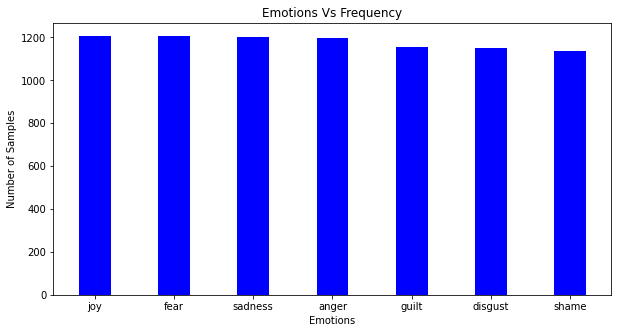

In [11]:
l = ["joy", 'fear', "anger", "sadness", "disgust", "shame", "guilt"]
l.sort()
label_freq = {}
for label, _ in data: 
    label_freq[label] = label_freq.get(label, 0) + 1

del label_freq['']
#print(label_freq)

label_count = {}
# print the labels and their counts in sorted order 
for l in sorted(label_freq, key=label_freq.get, reverse=True):
    label_count[convert_label(l, emotions)] = label_freq[l]
    print("{:10}({})  {}".format(convert_label(l, emotions), l, label_freq[l]))


#print(label_count)

import numpy as np
import matplotlib.pyplot as plt

Emotions = label_count.keys()
count = label_count.values()

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(Emotions, count, color = "blue",
        width = 0.4)
 
plt.xlabel("Emotions")
plt.ylabel("Number of Samples")
plt.title("Emotions Vs Frequency")

# To save the plot in .png format
plt.savefig('emotions vs samples.png', dpi=300, bbox_inches='tight')

plt.show()



In [5]:
# (2) preprocessing - removing the stopwords
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

nltk.download('stopwords')
stop_words = stopwords.words('english')

# Function for removing the stop word from the text
def remove_stop_words(data):
    sentences = ""
    data = data.split('\n')
    #print(data)
    for text in data:
        # Replacing each special character and numbers with a space
        text_alphanum = re.sub('[^a-z]', ' ', text)
        word_tokens = word_tokenize(text_alphanum)
        
        # Removing stop words
        sentence = ' '.join([w for w in word_tokens if (w not in stop_words)])
        sentences += sentence + "\n"
        #print(sentence)
        
    return sentence




[nltk_data] Downloading package stopwords to C:\Users\Sai
[nltk_data]     raj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
# (3) preprocessing - text normalization using lemmatization
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

text_word_cloud = ''
# word lemmatization (Normalization)
def noun_lemmatizer(sentences):
    # Init the Wordnet Lemmatizer
    lemmatizer = WordNetLemmatizer()
    sentences = sentences.split('\n')
    #print(sentences)
    lem_text = ''
    for line in sentences:
        #print(line)
        word_tokens = word_tokenize(line)
        sentence = ' '.join([lemmatizer.lemmatize(w, 'n') for w in word_tokens])
        lem_text += sentence + '\n'
    text_word_cloud = lem_text
    return lem_text


[nltk_data] Downloading package wordnet to C:\Users\Sai
[nltk_data]     raj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
# Function for generating ngrams of words 
def ngram(token, n):
    output = []
    for i in range(n-1, len(token)):
        ngram = ' '.join(token[i-n+1:i+1])
        output.append(ngram)
        #print(output)
    return output

# Function for creating feature
def create_feature(text, nrange=(1,1)):
    text_features = []
    text = text.lower()
    ###################
    #print(text)
    text = remove_stop_words(text)
    #print(text)
    text = noun_lemmatizer(text)
    #print(text)
    ###################
    text_alphanum = text
    #print(text_alphanum)
    for n in range(nrange[0], nrange[1]+1):
        text_features += ngram(text_alphanum.split(), n)
    text_punc = re.sub('[a-z0-9]', ' ', text)
    #print(text_punc)
    text_features += ngram(text_punc.split(), 1)
    #print(Counter(text_features))
    return Counter(text_features)

In [8]:
def convert_label(item, name):
    #print(item)
    items = list(map(float, item.split()))
    label = ""
    for idx in range(len(items)):
        if items[idx] == 1:
            label += name[idx] + " "
    return label.strip()

emotions = ["joy", "fear", "anger", "sadness", "disgust", "shame", "guilt"]

X_all = []
Y_all = []
text_word_cloud = ''
for label, text in data:
    text_word_cloud += " " + text
    Y_all.append(convert_label(label, emotions))
    X_all.append(create_feature(text, nrange=(1, 4)))


In [9]:
from sklearn import preprocessing
def labels_to_numbers(lables):
    le = preprocessing.LabelEncoder()
    le.fit(lables)
    li = le.transform(lables)
    return list(li)


from sklearn.metrics import precision_score
#y_true = [4, 2, 0, 5, 1, 6, 3, 4, 2, 0, 5, 1, 6, 3, 4, 2, 0, 5, 1, 6, 3]
#y_pred = [4, 2, 0, 5, 1, 6, 3, 4, 2, 0, 5, 1, 6, 7, 4, 2, 0, 5, 1, 6, 3]
#print(precision_score(y_true, y_pred, average='micro'))

def find_precision(y_true, y_pred):
    y_true = labels_to_numbers(y_true)
    #print(y_true)
    y_pred = labels_to_numbers(y_pred)
    #print(y_pred)
    result = precision_score(y_true, y_pred, average='macro')
    return result


#y_true = ["joy", "fear", "anger", "sadness", "disgust", "shame", "guilt", "sadness", "disgust", "shame", "guilt"]
#y_pred = ["joy", "fear", "anger", "sadness", "disgust", "shame", "guilt", "sadness", "disgust", "shame", "guilt"]

#print(find_precision(y_true, y_pred))

In [10]:
from sklearn.metrics import precision_recall_fscore_support
#(1) Spliting the dataset training-80% | testing-20%
X_train, X_test, y_train, y_test = train_test_split(X_all, Y_all, test_size = 0.2, random_state = 123)

#print(X_test)
#print(y_test[:100])

def train_test(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))
    #precision = find_precision(y_test, clf.predict(X_test))
    precision, recall, f1_score, support = precision_recall_fscore_support(y_test, clf.predict(X_test), average='macro')
    return train_acc, test_acc, precision, recall, f1_score



from sklearn.feature_extraction import DictVectorizer
vectorizer = DictVectorizer(sparse = True)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
#print(X_test.toarray())

In [12]:
from sklearn.svm import SVC
linear_svm = SVC(kernel='linear')
rbf_svm = SVC(kernel ='rbf', random_state = 0)
poly_svm = SVC(kernel='poly', degree=8)
sigmoid_svm = SVC(kernel ='sigmoid')

clifs = [linear_svm, rbf_svm, poly_svm, sigmoid_svm]
kernals = ["Linear SVM", "Radial basis function", "Polynomial function", "Sigmoid function"]

# train and test them 
print("| {:25} | {} | {} | {:13} | {:13} | {:13} | ".format("SVM Kernals", "Training Accuracy", "Test Accuracy", 
                                                                   "Precision", "Recall", "F1 Score"))
print("| {} | {} | {} | {} | {} | {} |".format("-"*25, "-"*17, "-"*13, "-"*13, "-"*13, "-"*13))
i=0
for clf in clifs: 
    clf_name = clf.__class__.__name__
    train_acc, test_acc, precision, recall, f1_score= train_test(clf, X_train, X_test, y_train, y_test)
    print("| {:25} | {:17.7f} | {:13.7f} | {:13.7f} | {:13.7f} | {:13.7f} |".format(kernals[i], train_acc, 
                                                                                               test_acc, precision, recall, 
                                                                                               f1_score))
    i = i+1

| SVM Kernals               | Training Accuracy | Test Accuracy | Precision     | Recall        | F1 Score      | 
| ------------------------- | ----------------- | ------------- | ------------- | ------------- | ------------- |
| Linear SVM                |         0.9953066 |     0.8147700 |     0.8147114 |     0.8150066 |     0.8143066 |
| Radial basis function     |         0.9653293 |     0.7935835 |     0.8004252 |     0.7923994 |     0.7917858 |
| Polynomial function       |         0.5417108 |     0.3728814 |     0.8794955 |     0.3695663 |     0.4034343 |
| Sigmoid function          |         0.9233914 |     0.7475787 |     0.7484564 |     0.7490715 |     0.7455942 |


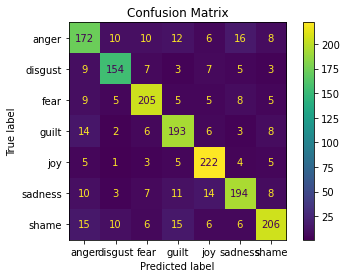

In [13]:
import matplotlib.pyplot as plt  
from sklearn.metrics import plot_confusion_matrix

clf = clifs[0]
clf.fit(X_train, y_train)


disp = plot_confusion_matrix(clf, X_test, y_test)  
disp.ax_.set_title("Confusion Matrix")

# To save the plot in .png format
plt.savefig('Confusion Matrix.png', dpi=300, bbox_inches='tight')

plt.show() 

In [35]:
emoji_dict = {"joy":"😂", "fear":"😱", "anger":"😠", "sadness":"😢", "disgust":"🤢", "shame":"😳", "guilt":"😕"}

txt1 = "i'm very good today"
txt2 = "I was thinking about death"
txt3 = "He does something wrong which affects me negatively"
txt4 = "When my gradmother died."
txt5 = "bad smelling wash room"
txt6 = "He was caught stealing apples in a neighbor's garden."
txt7 = "I realized it was my mistake"

texts = [txt1, txt2, txt3, txt4, txt5, txt6, txt7]
for text in texts: 
    features = create_feature(text, nrange=(1, 4))
    features = vectorizer.transform(features)
    
    prediction = clf.predict(features)[0]
    #print(prediction)
    print( text, "=>",prediction, emoji_dict[prediction])

i'm very good today => joy 😂
I was thinking about death => fear 😱
He does something wrong which affects me negatively => anger 😠
When my gradmother died. => sadness 😢
bad smelling wash room => disgust 🤢
He was caught stealing apples in a neighbor's garden. => shame 😳
I realized it was my mistake => guilt 😕


In [55]:
from sklearn import preprocessing
def labels_to_numbers(lables):
    le = preprocessing.LabelEncoder()
    le.fit(s)
    li = le.transform(s)
    return list(li)

In [56]:
from sklearn.metrics import precision_score
#y_true = [4, 2, 0, 5, 1, 6, 3, 4, 2, 0, 5, 1, 6, 3, 4, 2, 0, 5, 1, 6, 3]
#y_pred = [4, 2, 0, 5, 1, 6, 3, 4, 2, 0, 5, 1, 6, 7, 4, 2, 0, 5, 1, 6, 3]
#print(precision_score(y_true, y_pred, average='micro'))

def find_precision(y_true, y_pred):
    y_true = labels_to_numbers(y_true)
    y_pred = labels_to_numbers(y_pred)
    result = precision_score(y_true, y_pred, average='micro')
    return result


#y_true = ["joy", "fear", "anger", "sadness", "disgust", "shame", "guilt", "sadness", "disgust", "shame", "guilt"]
#y_pred = ["joy", "fear", "anger", "sadness", "disgust", "shame", "guilt", "sadness", "disgust", "shame", "guilt"]

#print(find_precision(y_true, y_pred))

In [57]:
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
y_true = np.array(['cat', 'dog', 'pig', 'cat', 'dog', 'pig'])
y_pred = np.array(['cat', 'pig', 'dog', 'cat', 'cat', 'dog'])
p, r, s , n = precision_recall_fscore_support(y_true, y_pred, average='macro')
print(p, r, s, n)

0.2222222222222222 0.3333333333333333 0.26666666666666666 None


In [1]:
from PIL import Image
from wordcloud import WordCloud

import matplotlib.pyplot as plt

# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text_word_cloud)


f = plt.figure()
f.set_figwidth(200)
f.set_figheight(200) 

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
# To save the plot in .png format
plt.savefig('wordcloud.png', dpi=300, bbox_inches='tight')
plt.show()

NameError: name 'text_word_cloud' is not defined